<a href="https://colab.research.google.com/github/elpinchepastel/convolutional-networks/blob/master/Taller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim  
import pandas as pd
import torchvision.transforms as transforms  
import torchvision
import os
from time import time 
from skimage import io
import matplotlib.pyplot as plt
from skimage.transform import resize
from torch.utils.data import (Dataset, DataLoader)  

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)
classes = ('Circulo', 'Cuadrado', 'Estrella', 'Triangulo')

cuda:0


In [11]:
## Esto es lo que vimos en clase
class ShapesDataset (Dataset):
  def __init__(self, csv_file, root_dir, transform=None):
    self.annotations = pd.read_csv(csv_file)
    self.root_dir = root_dir
    self.transform = transform
  
  def __len__(self):
    return len(self.annotations)
  
  def __getitem__(self, index):
    img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
    image = io.imread(img_path)

    image = resize(image, (32,32))
    
    y_label = torch.tensor(int(self.annotations.iloc[index, 1]))
    if self.transform:
      image = self.transform(image)
    
    return (image, y_label)

In [12]:
## Acá instanciamos o creamos el objeto "dataset" de la clase "ShapesDataset"
## Le pasamos los directorios de los archivos, cambian "CSVS" y "CNNS" segun la carpeta en la que tienen los datos
dataset = ShapesDataset(
    csv_file="/content/drive/My Drive/IA/Archivos_Shapes/Muestra2K.csv",
    root_dir="/content/drive/My Drive/IA/Archivos_Shapes/muestra",
    transform=transforms.ToTensor())## Transformamos los datos a tensor

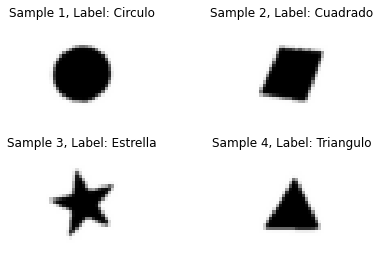

In [14]:
## Este codigo es solamente para que puedan ver las 4 formas, no es esencial
fig = plt.figure()

for i in range(len(dataset)):
    imagen, label = dataset[(i+1)*510]
    ax = plt.subplot(2, 2, i + 1)
    plt.tight_layout()
    ax.set_title('Sample {}, Label: {}'.format(i+1,classes[label] ))
    ax.axis('off')
    plt.imshow(imagen.squeeze_(0), cmap='gray')

    if i == 3:
        plt.show()
        break

In [15]:
 batch_size = 1
## Definimos el tamaño del batch_size en 1 (La cantidad de imagenes)
## Partimos el dataset en 80% entrenamiento, 20% prueba, juntos suman 2044
train_set, test_set = torch.utils.data.random_split(dataset, [1636, 408])
## Creamos los objetos que nos van a permitir cargar los datos en nuestra red (Objetos iterables de los que les hablaba al final de la sesion 1)
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True)

In [16]:
class Net (nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        ## LLenar con las capas de convolución   y pooling
        
    def forward (self, x):
    
        
        ## Llenar con el orden
        
        return F.log_softmax(x, dim=1) ## Funcion de activación softmax

    
    

net = Net()
net = net.double()
#Uncoment for training with cuda
net.to(device)
print(net)

Net()


- Capa de entrada **## Recuerden que la capa de entrada no se debe codificar.**
- Capa convolucional1: in_Channels = 1, Out_Channels = 32, Kernel_size = 3 
- Function de activación Relu  
- Capa convolucional2: in_Channels = 32, Out_Channels = 32, Kernel_size = 3 
- Capa de Max Pooling1: Kernel_size = 2
- Function de activación Relu  
- Capa convolucional3: in_Channels = 32, Out_Channels = 64, Kernel_size = 3 
- Capa de Max Pooling2: Kernel_size = 2
- Función de activación Relu  
- Flatten
- Capa lineal 1: n_Channels = ?, Out_Channels = 256
- Función de activación Relu  
- Capa lineal 2: n_Channels = 256, Out_Channels = 4
- Función de activación: F.log_softmax(x, dim = 1)

**Por fuera de la clase:**

net = Net() 

net = net.double() ## Se convierten los parámetros de la red al mismo tipo de tensor que los datos de entrada

net.to(device) ## Se lleva la red a GPU

Tener en cuenta que el "Net" es el nombre que le dieron a la clase (red), "net" es solo un nombre que yo escogi para darle a un nuevo objeto de la clase "Net".


## NOTA 1: Si cambian el nombre de la clase "Net" al momento de definirla deben cambiar Net() por ***(), donde los asteriscos son el nombre que le dieron a su clase, por ejemplo: 

net = Neuronas() 

## NOTA 2: Si cambian el nombre del objeto "net" deben cambiarlo en donde aparezca, por ejemplo: 

red = Net()

red = red.double()

red.to(device)

## NOTA 3: En la capa lineal 1 hace falta el valor de entrada, debe ser calculado con la ecuación que dejo más abajo de la siguiente forma:

La capa de entrada recibe 32x32 pixeles, la primera capa convolucional recibe esos pixeles y aplica un kernel de 3x3, no aplica padding y como no aparece stride por default es 1.

Ejemplo:

[(32-3+2*0)/1]+1 = 30

30 es la cantidad de pixeles, recuerden que en las capas convolucionales no es necesario indicar los pixeles sino la cantidad de canales, deben seguir aplicando la ecuación para cada capa convolucional (incluidas las capas de pooling), al llegar a la ultima capa convolucional calculan la cantidad de pixeles y eso lo elevan al cuadrado (multiplican por si mismo el resultado, alto por ancho), luego multiplican por la cantidad de canales de salida que seria 64 y obtendrán el parámetro que falta.

**Recuerden que las capas de pooling de 2x2 reducen a la mitad el tamaño de la imagen, y que si no es un numero entero queda del tamaño sin la parte decimal.**

## Ecuación capas convolucionales: [(W−K+2P)/S]+1

Donde: 

"W" es el ancho de la imagen, la ecuacion se hace para alto y ancho, pero como es el mismo solo la hacemos una vez, por eso al final debemos elevar al cuadrado o multiplicar por si mismo el valor de los pixeles, para obtener W*H, H es el alto.

"K" es el kernel size de esa capa, como todos son 3 siempre es el mismo.

"P" es el padding, como no hay es 2*0.

"S" es el stride, como no se especifica por default es 1.

In [ ]:
import torch.optim as optim
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

In [ ]:
num_epochs = 2
time0 = time()
for epoch in range(num_epochs):  
    print("Epoch: ", epoch)
    running_loss = 0.0
    for i, data in enumerate(???, 0):
        
        ## dividir entradas y etiquetas y llevarlas a GPU
        
        ## Gradientes a cero

        ## forward + backward + optimize

        ## Acumular perdida
        

    else:
        print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss /len(train_loader)))
            

print('Entrenamiento finalizado')
print("\nTraining Time (in minutes) =",(time()-time0))

In [ ]:
path = 'mired.pth'
torch.save(net.state_dict(), path)

In [ ]:
correct = 0
total = 0
class_correct = [0,0,0,0]
class_total = [0,0,0,0]
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if (predicted == labels):
            class_correct[labels] += 1
        else:
            class_total[labels] += 1
print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

In [ ]:
print(class_correct)
print(class_total)

## Parte 2

## Desarrollo
- Identificar el objeto iterable que hace falta en el loop de entrenamiento. (Esta identificado con "???")

Nota 1: recuerden que el objeto sobre el que se itera una vez se ingresa al loop de las epocas es el objeto construido con los datos de entrenamiento y sus respectivas etiquetas.

- Llevar los gradientes a cero para garantizar el correcto calculo de los gradientes en cada iteracion.

- Aplicar el forward, backward, optimize

Nota 2: Recuerden que para calcular el backward deben propagar la perdida, por tanto deben calcular la perdida antes.

- Acumular la perdida de cada iteracion y dividirla sobre el tamaño del objeto iterable que falta para saber la perdida sobre ese batch.(La parte de la división ya esta en el print)

## Fecha limite de entrega: Martes 6 de Octubre